In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import FunctionTransformer


In [10]:
# Loading datasets
data_dev = pd.read_csv('datasets/development_features_20.csv')
data_eval = pd.read_csv('datasets/evaluation_features_20.csv')

Xdata_dev = data_dev.drop(columns=['path', 'Id', 'age', 'num_words'])
ydata_dev = data_dev['age']
Xdata_eval = data_eval.drop(columns=['path', 'Id', 'num_words'])



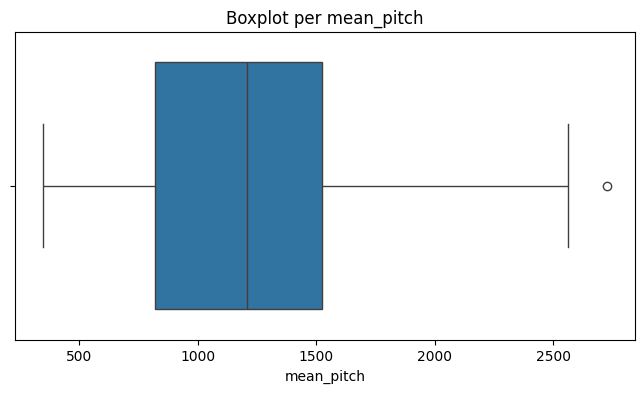

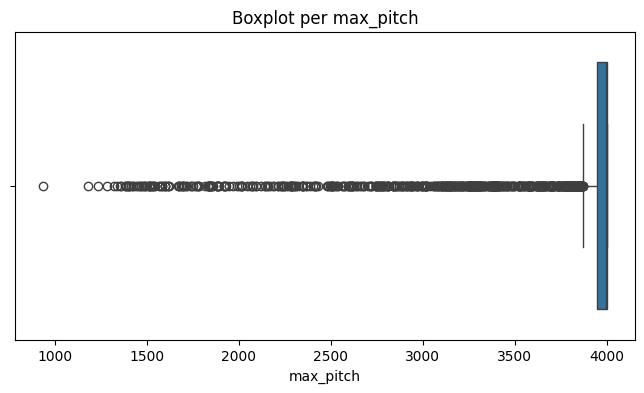

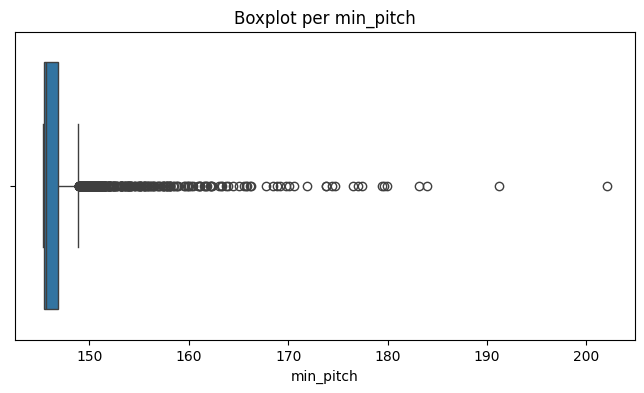

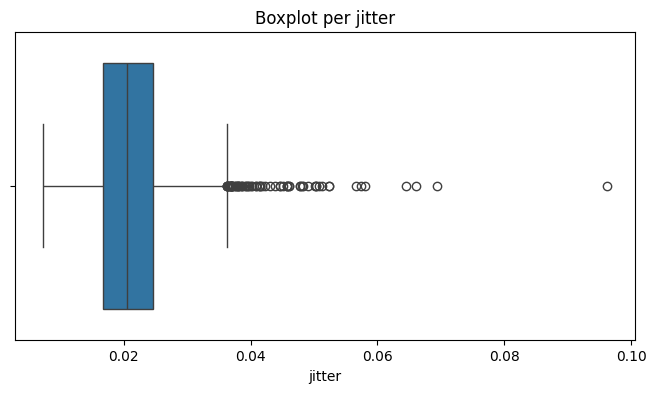

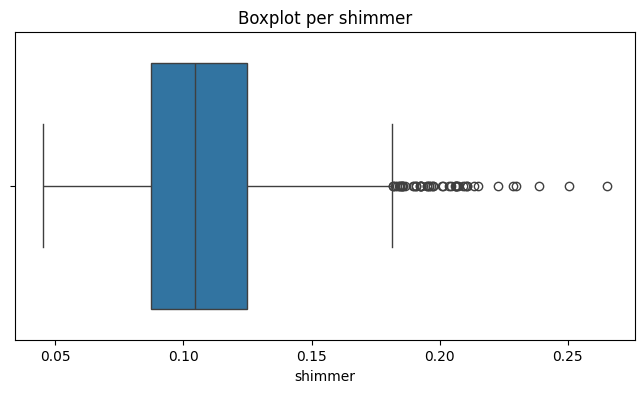

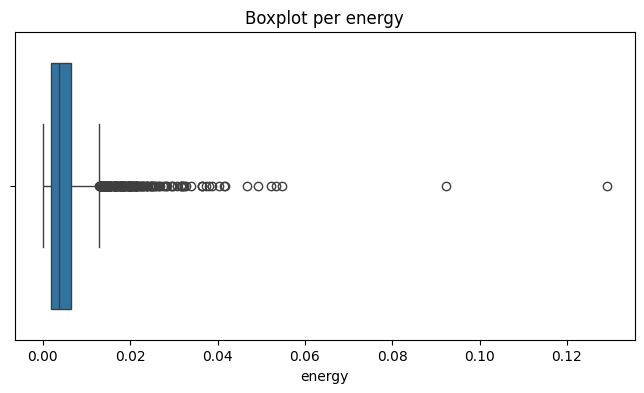

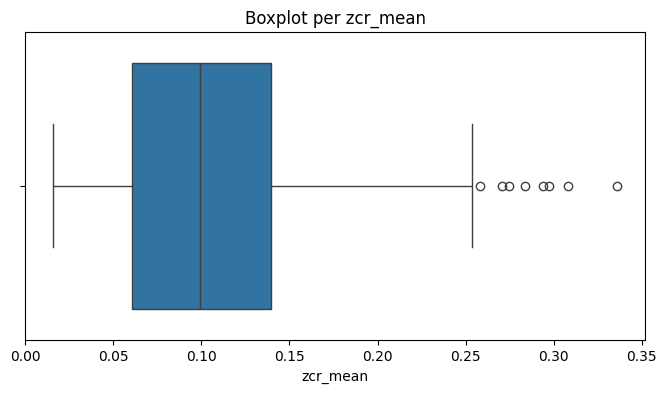

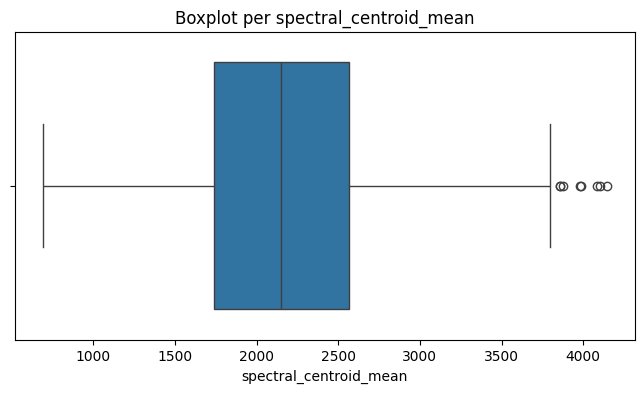

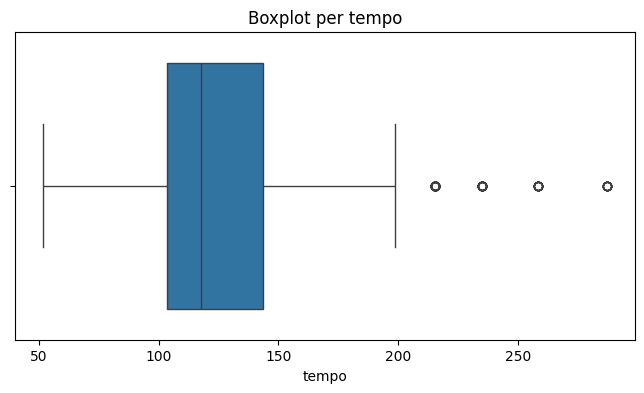

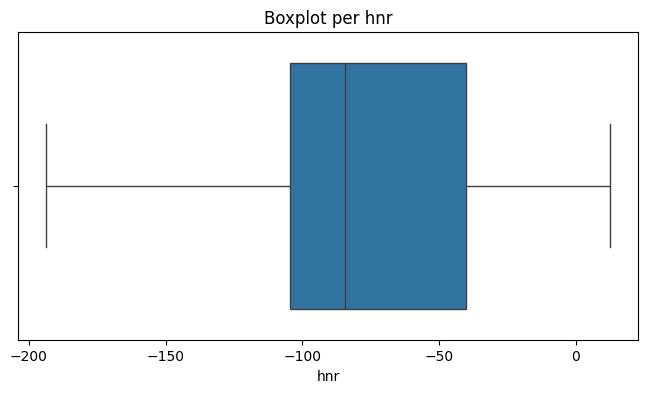

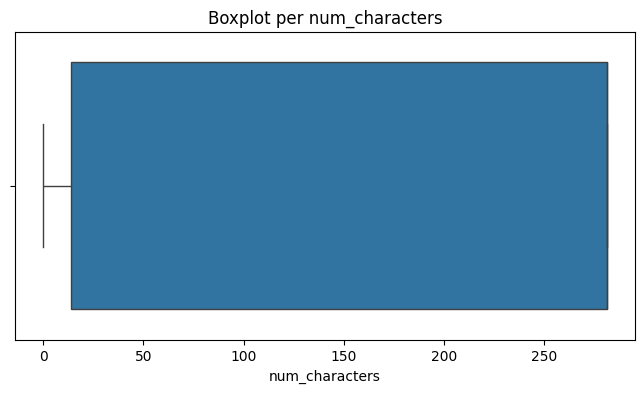

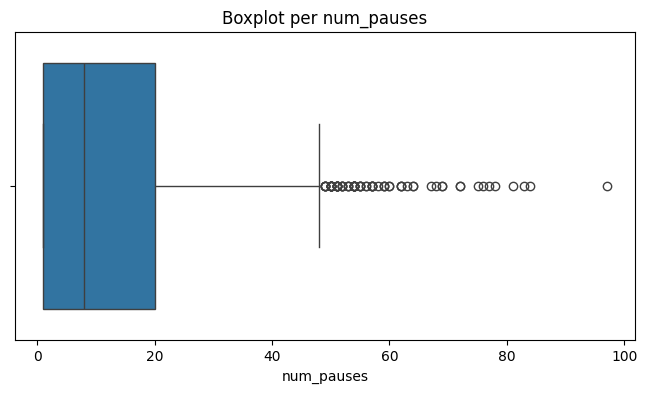

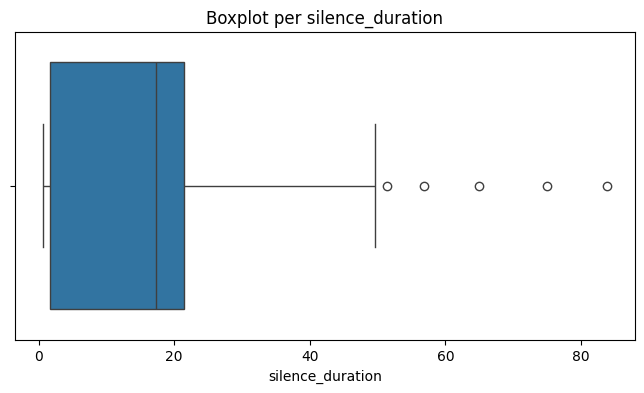

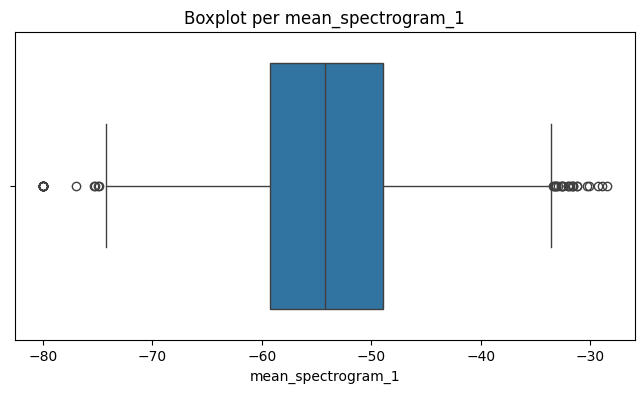

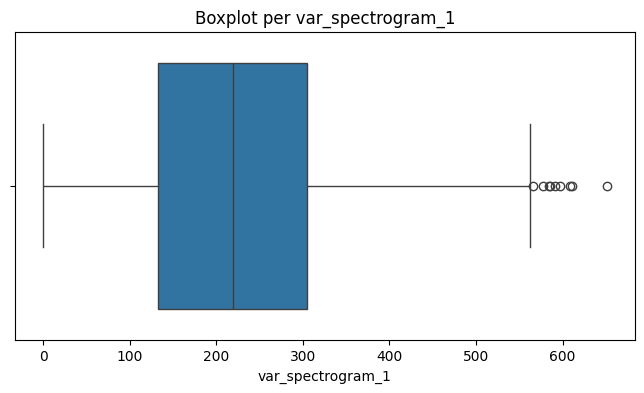

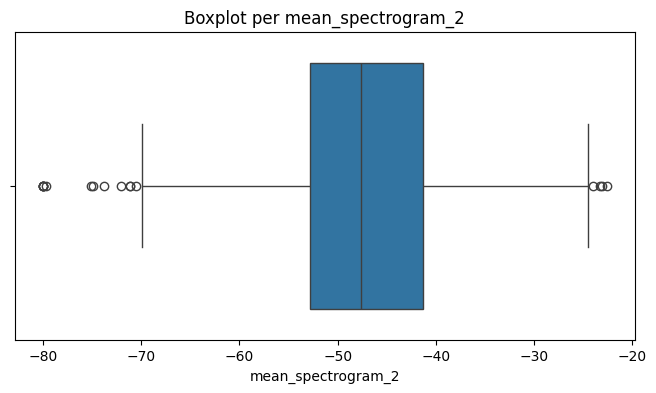

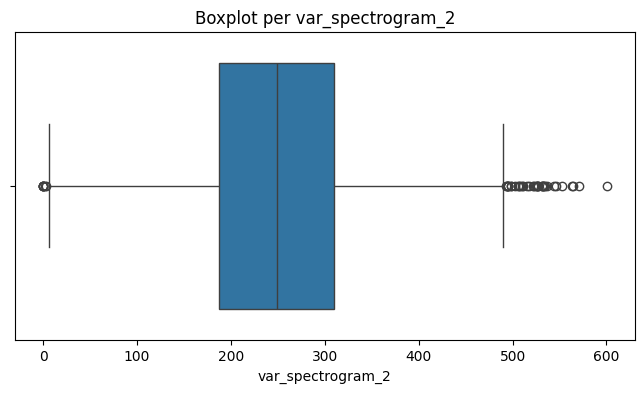

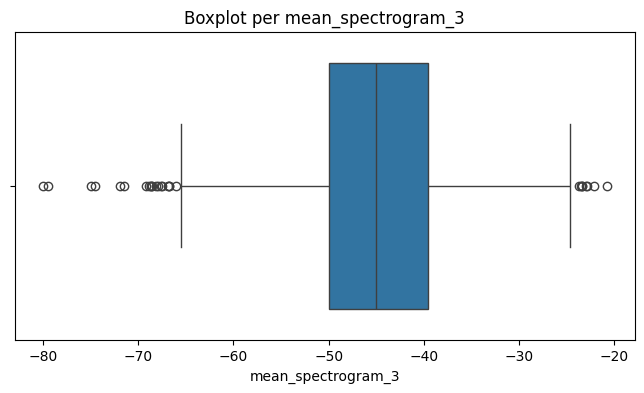

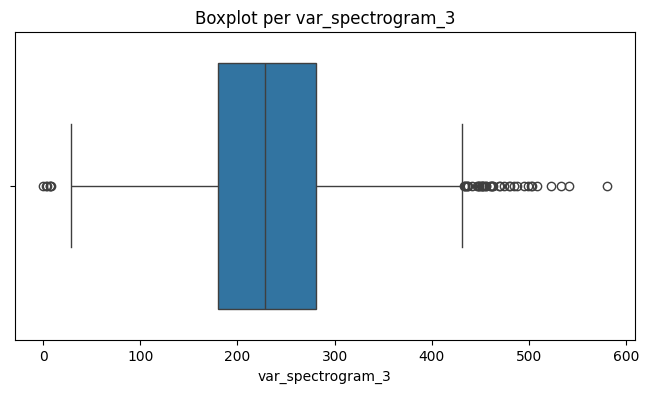

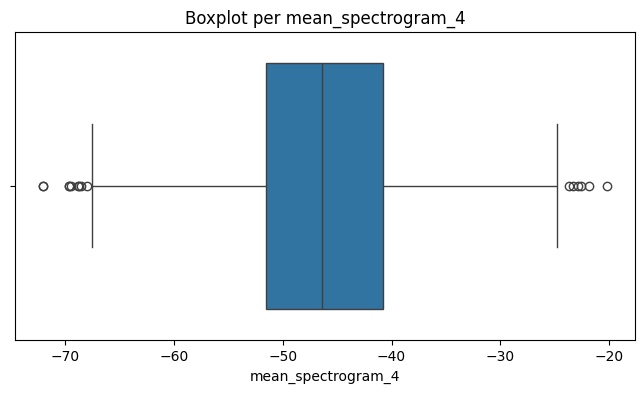

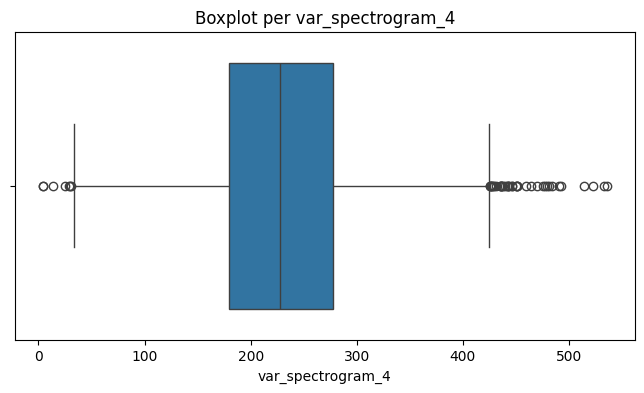

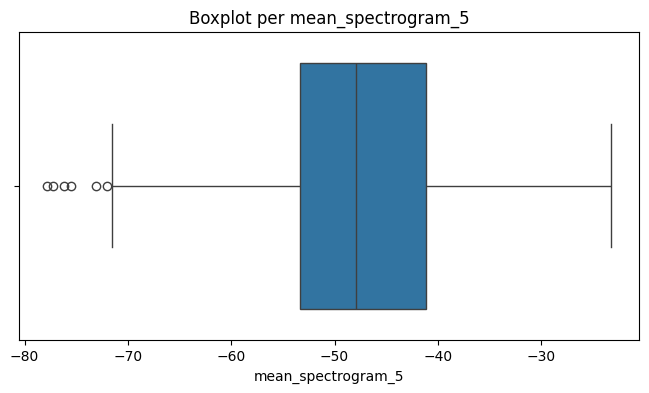

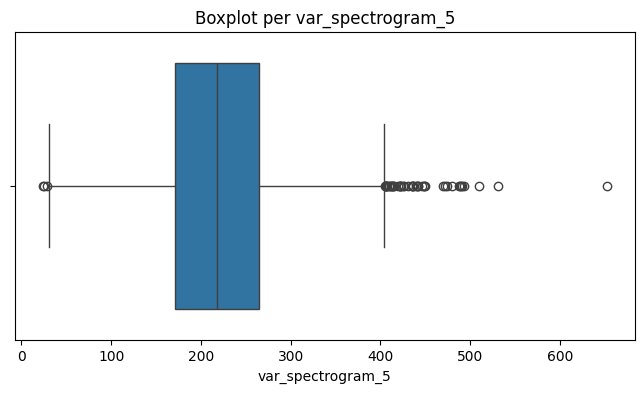

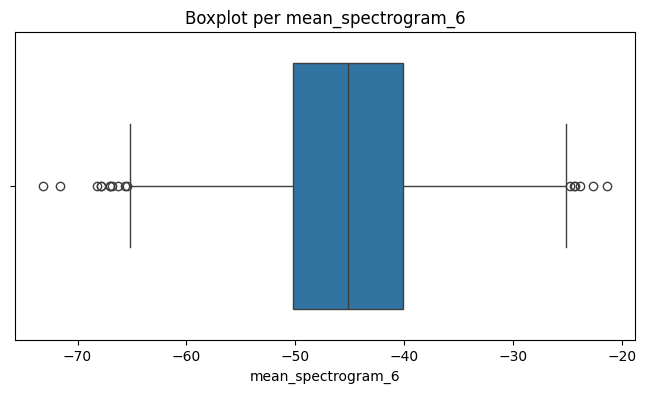

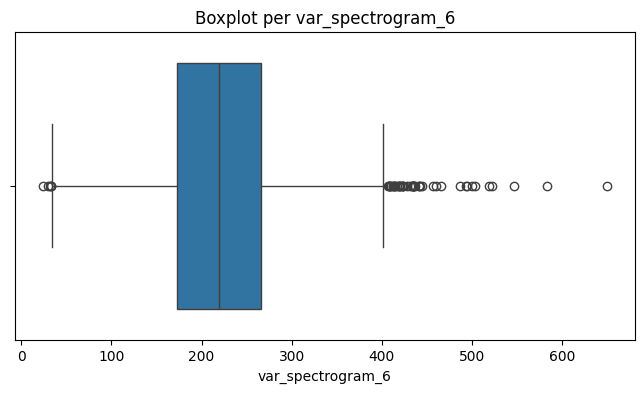

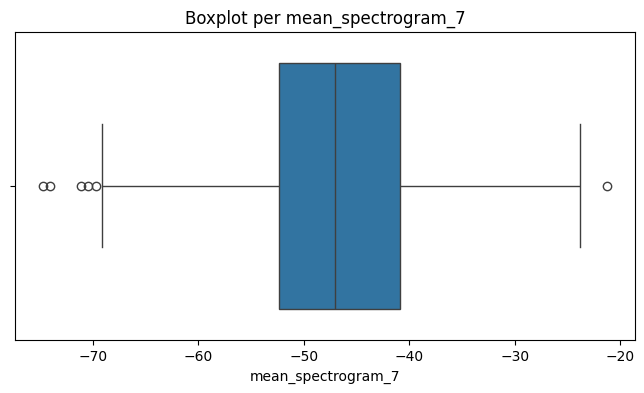

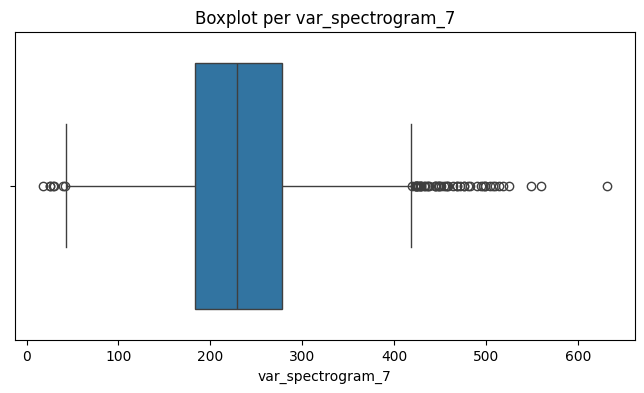

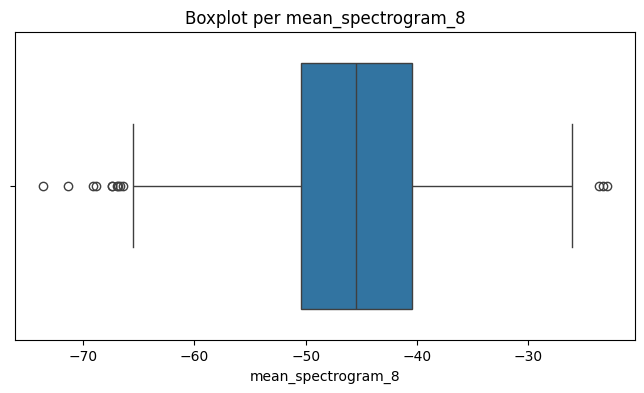

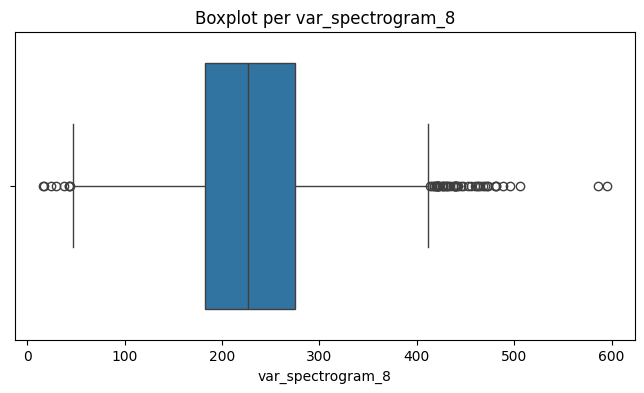

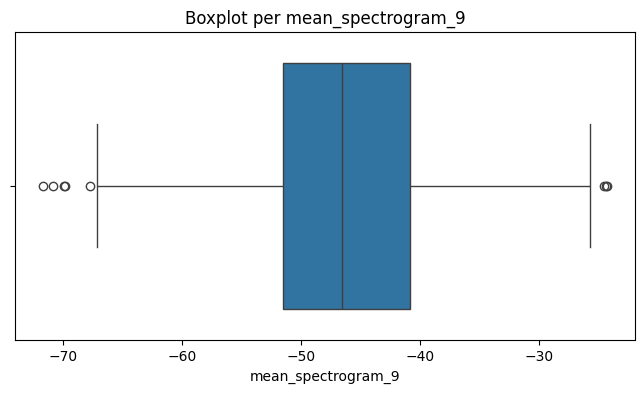

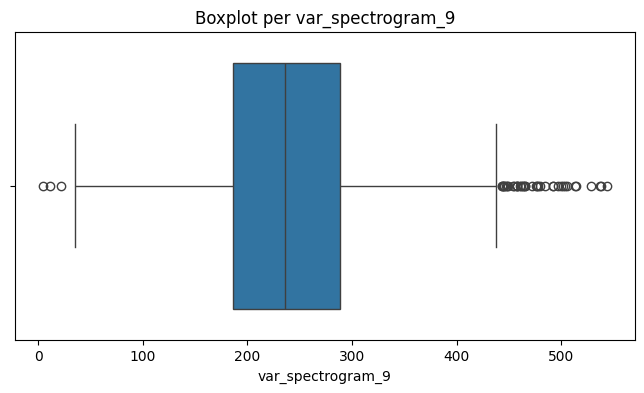

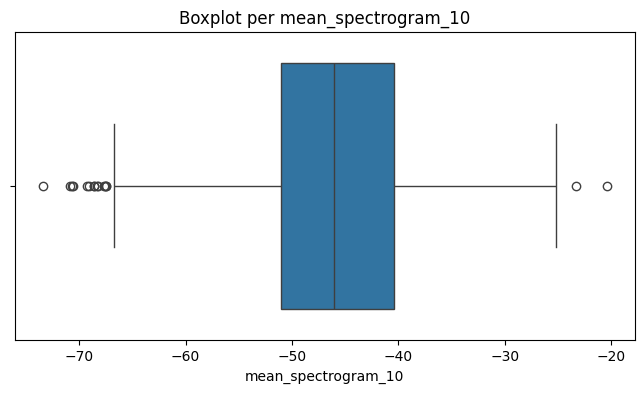

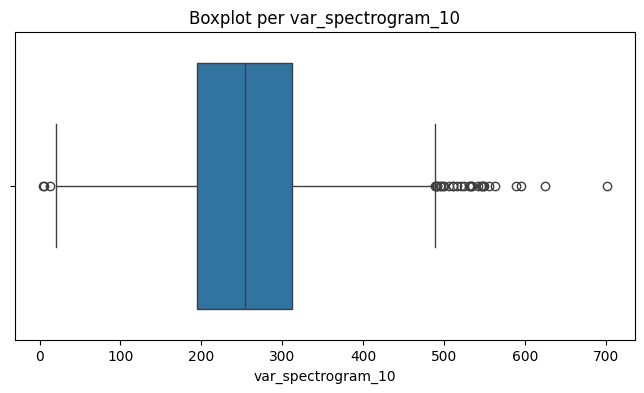

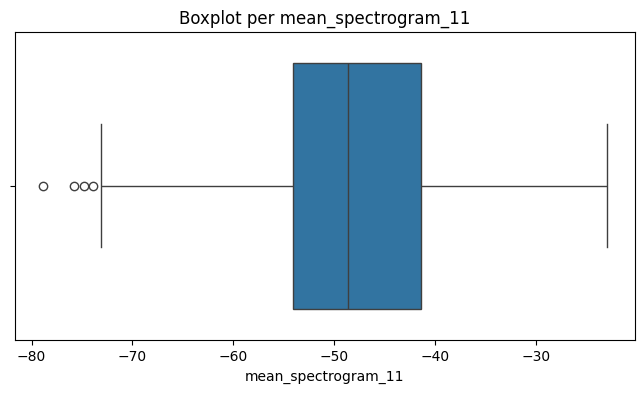

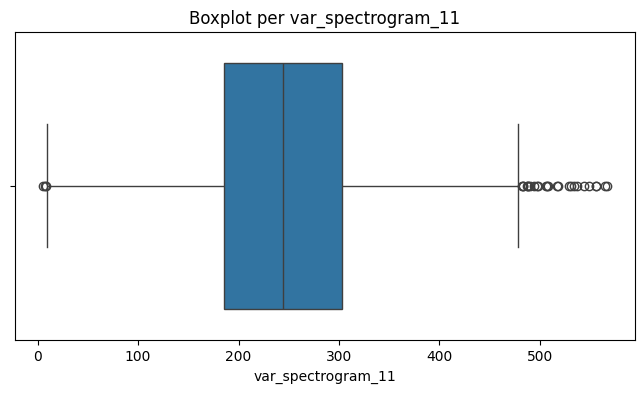

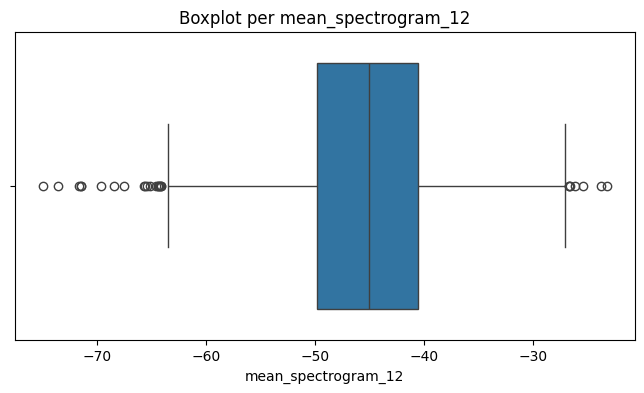

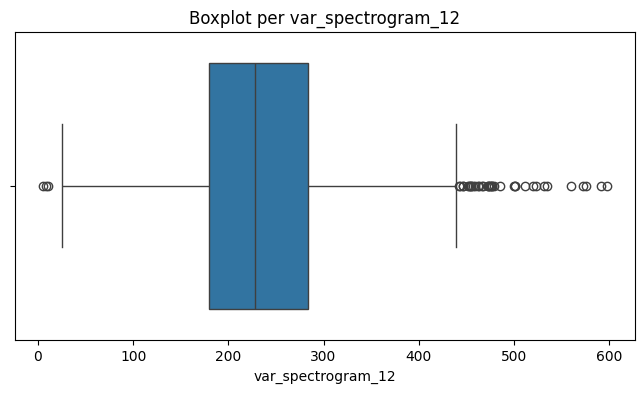

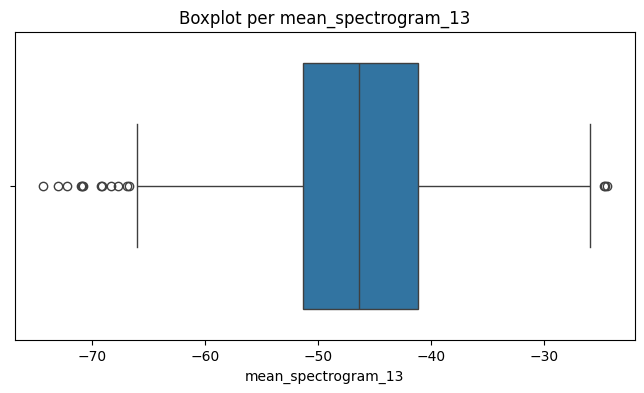

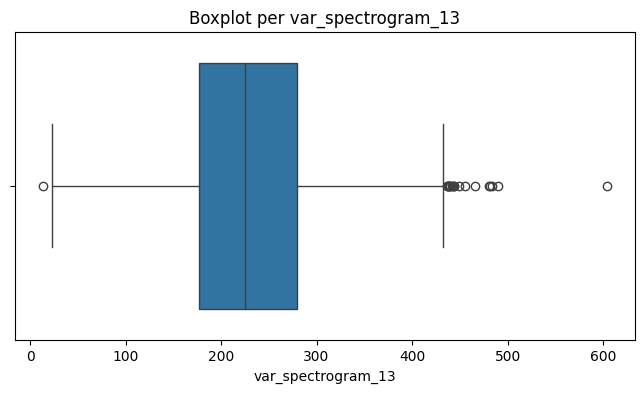

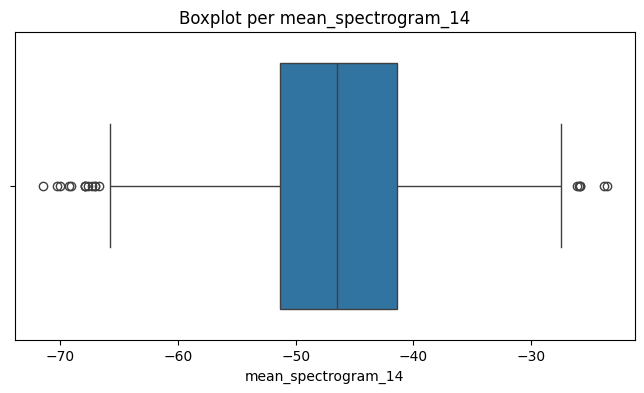

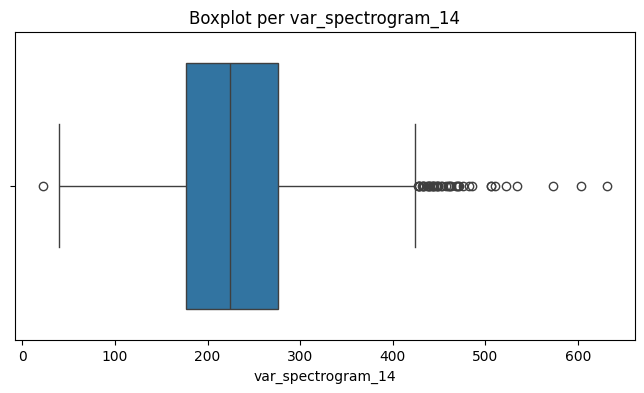

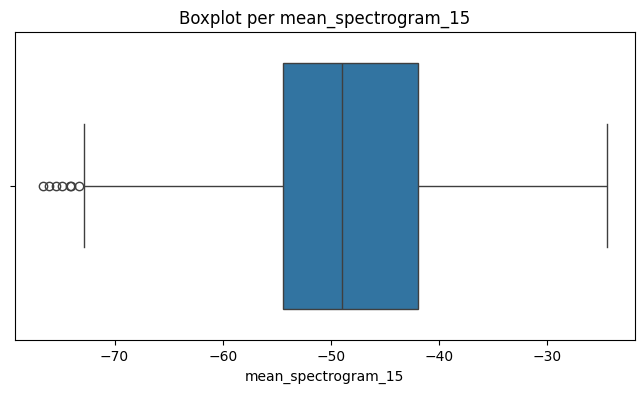

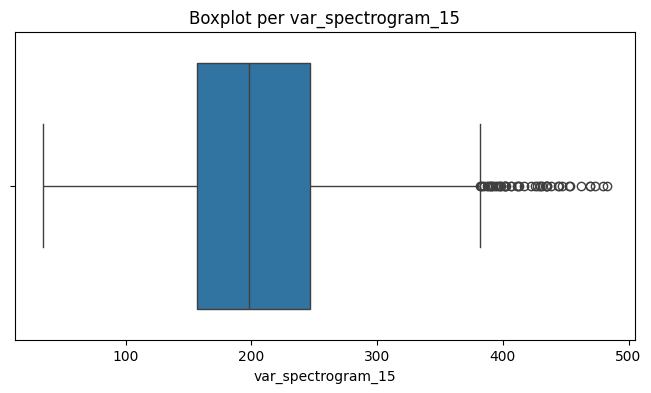

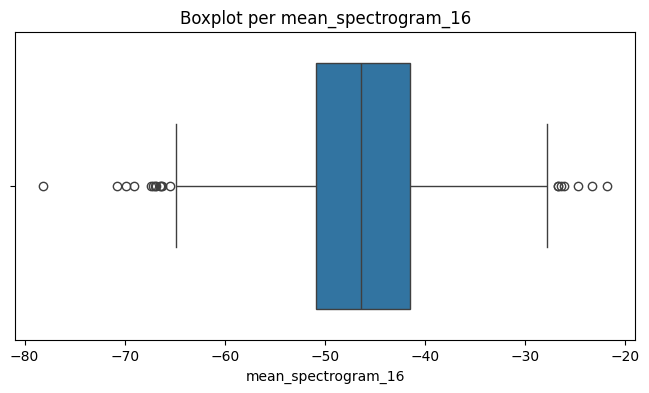

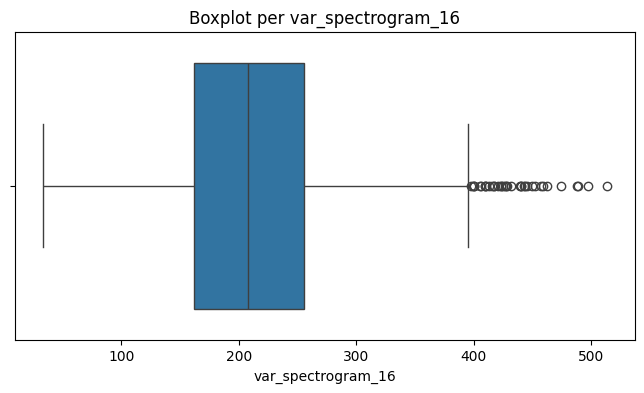

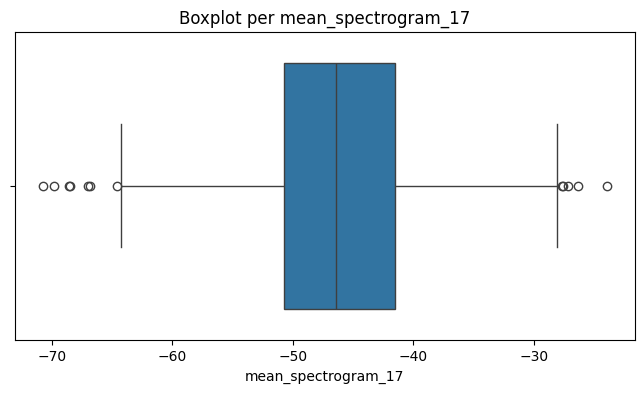

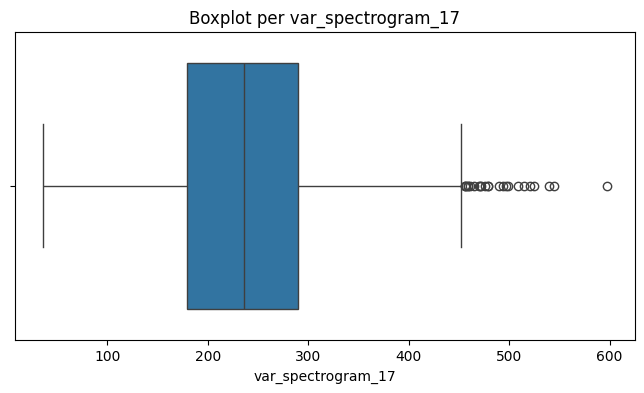

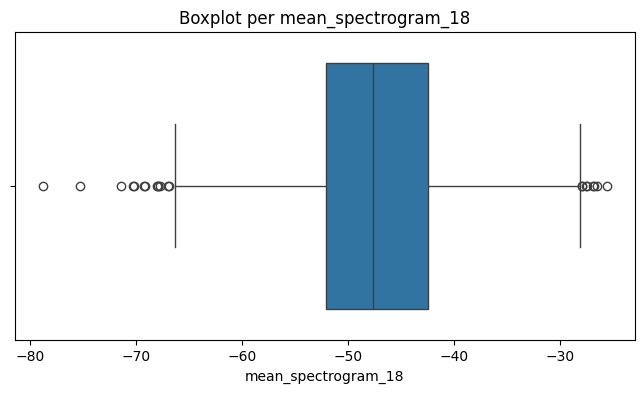

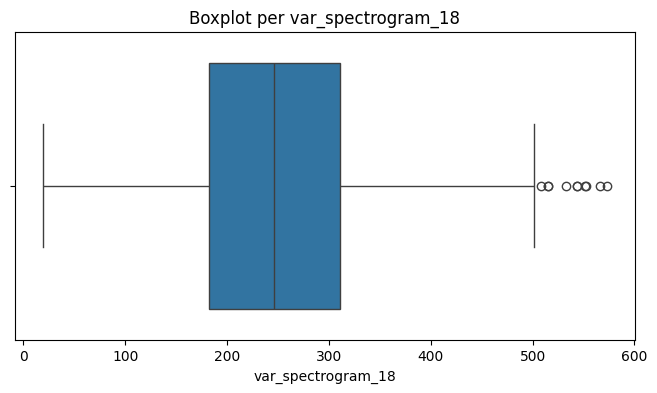

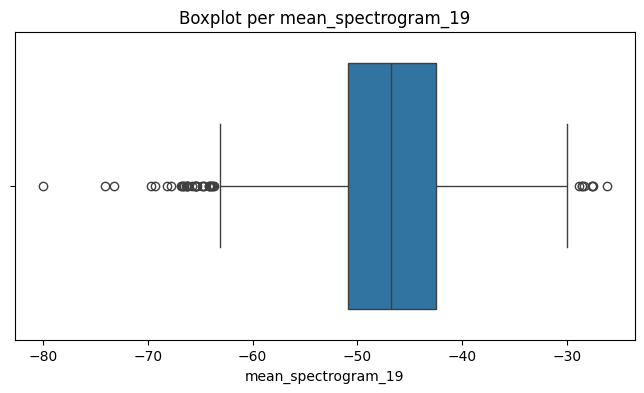

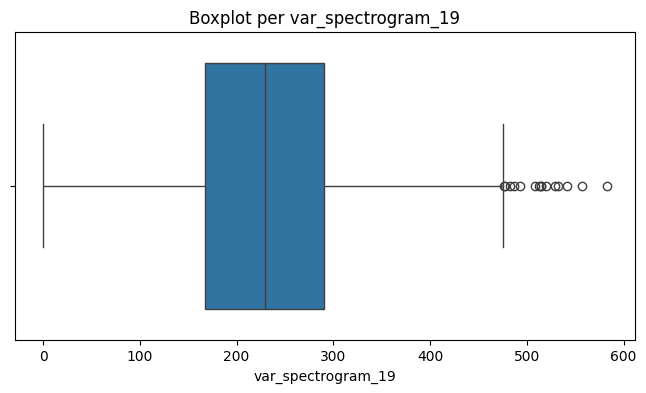

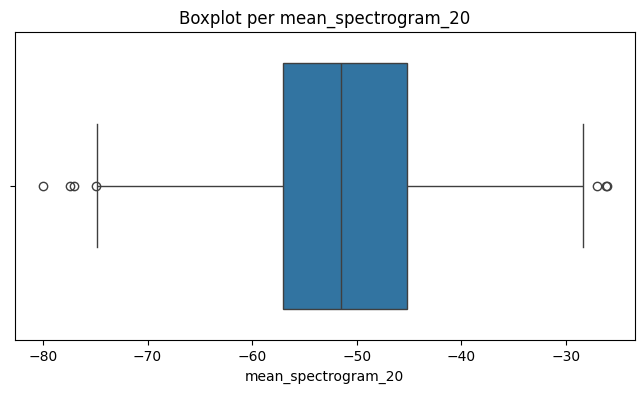

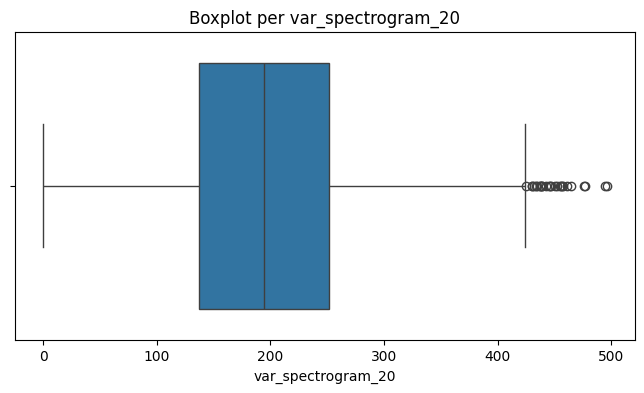

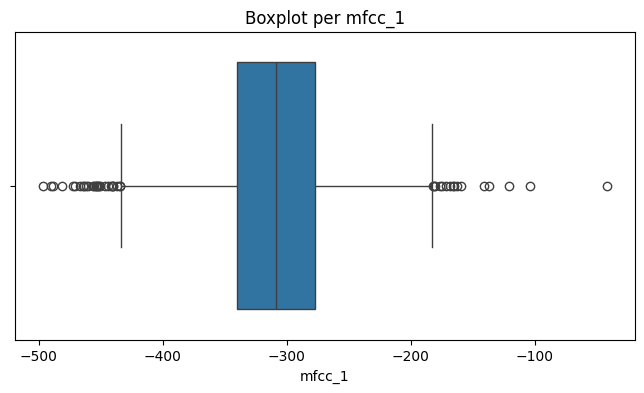

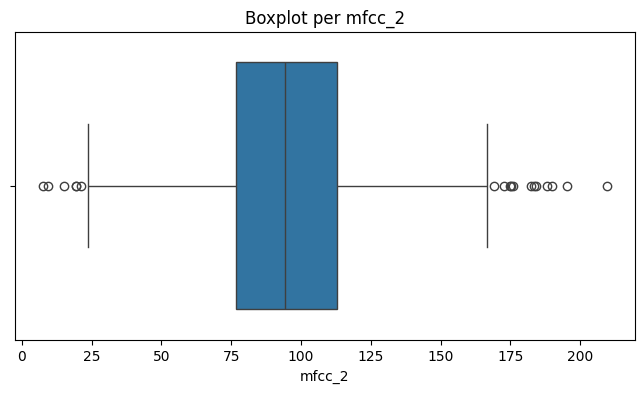

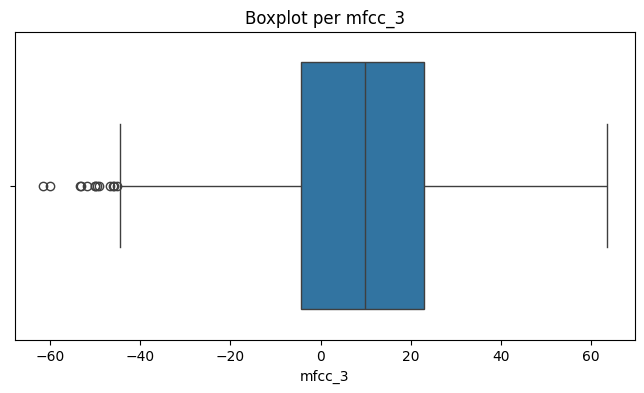

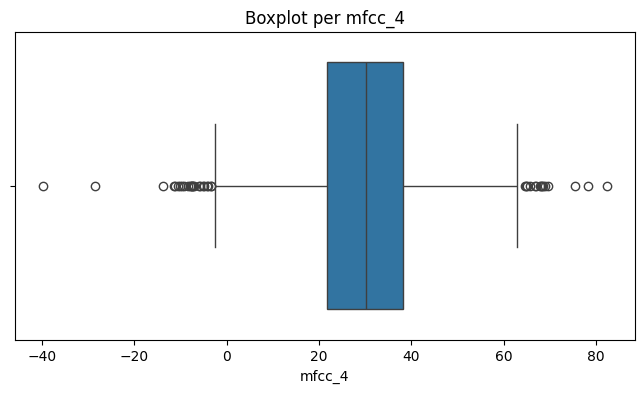

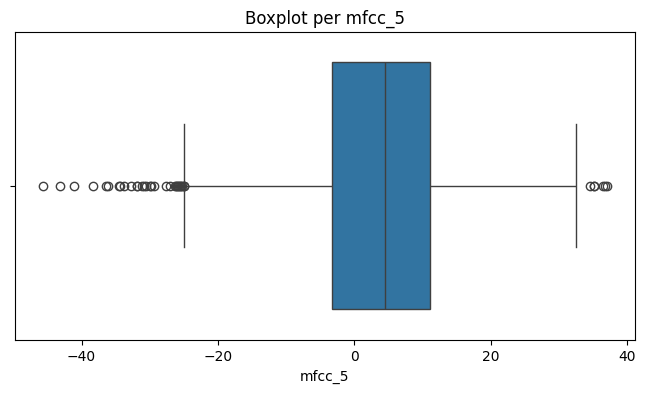

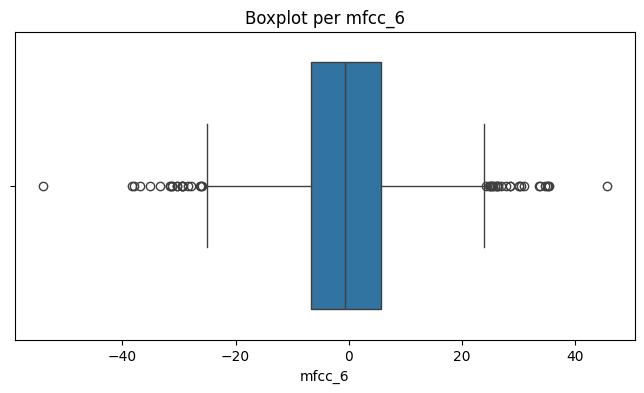

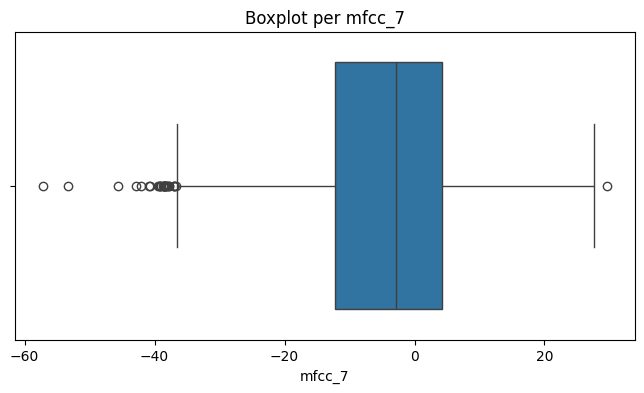

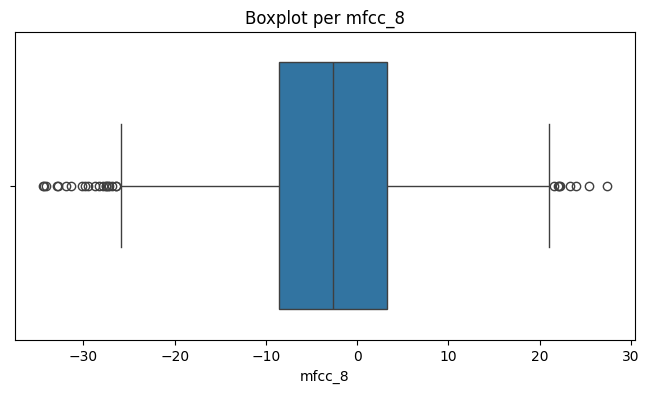

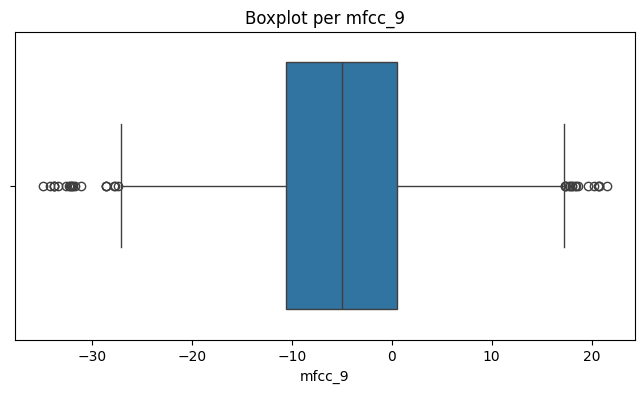

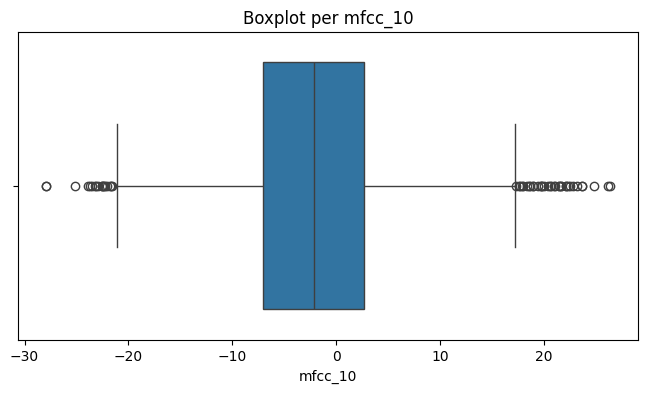

In [12]:
# Seleziona solo le variabili numeriche
numerical_columns = Xdata_dev.select_dtypes(include=['float64', 'int64']).columns

non_binary_columns = [col for col in numerical_columns if Xdata_dev[col].nunique() > 2]


# Crea un boxplot per ogni variabile numerica
for col in non_binary_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=Xdata_dev[col])
    plt.title(f"Boxplot per {col}")
    plt.xlabel(col)
    plt.show()

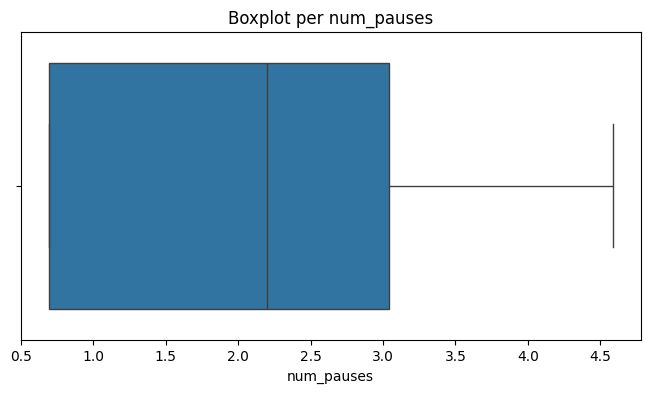

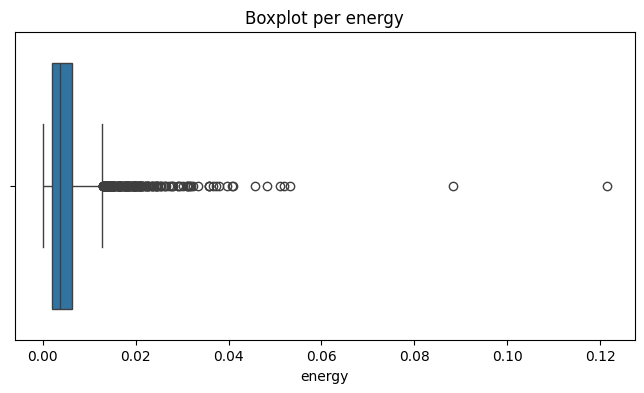

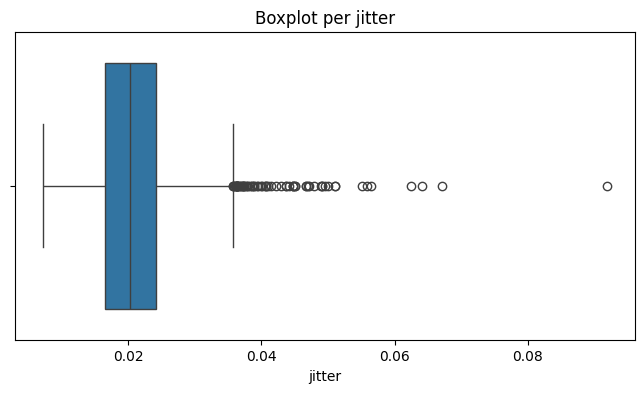

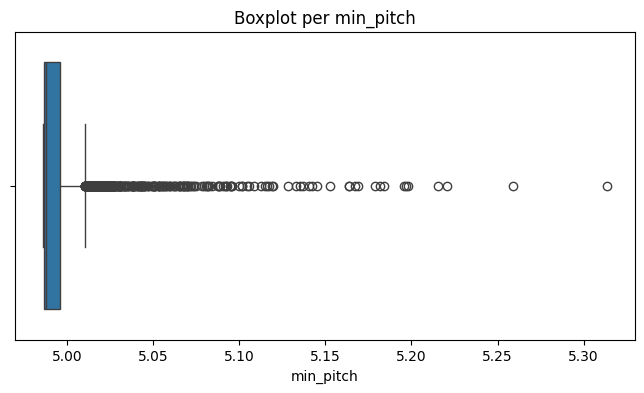

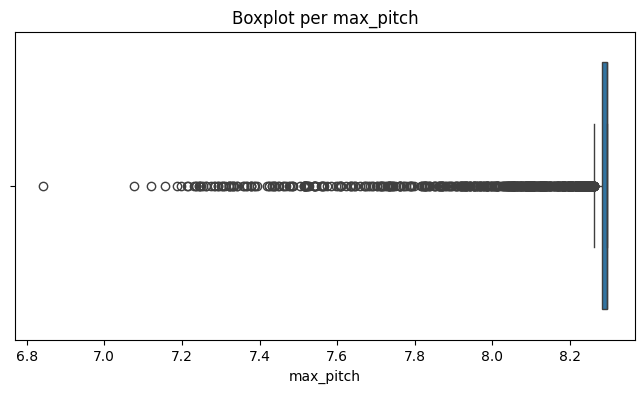

In [29]:
# change the variable in log scale for
# num pauses, energy, jitter, minpitch, maxpitch

# log transformation

copy_dev = Xdata_dev.copy()
copy_eval = Xdata_eval.copy()

for col in ['num_pauses',  'energy', 'jitter', 'min_pitch', 'max_pitch']:
    copy_dev[col] = np.log1p(copy_dev[col])

for col in ['num_pauses', 'energy', 'jitter', 'min_pitch', 'max_pitch']:
    copy_eval[col] = np.log1p(copy_eval[col])

# create the poxplot for the new variables
for col in ['num_pauses','energy', 'jitter', 'min_pitch', 'max_pitch']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=copy_dev[col])
    plt.title(f"Boxplot per {col}")
    plt.xlabel(col)
    plt.show()


In [30]:
# Dividing the dataset into development and validation
X_train, X_validation, y_train, y_validation = train_test_split(copy_dev, ydata_dev, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

numfeat = 1 , RMSE = 10.775897535015847 
numfeat = 2 , RMSE = 10.685849079415856 
numfeat = 3 , RMSE = 10.655771970088407 
numfeat = 4 , RMSE = 10.447924954622808 
numfeat = 5 , RMSE = 10.235140898809984 
numfeat = 6 , RMSE = 10.100357551561006 
numfeat = 7 , RMSE = 10.086755978445527 
numfeat = 8 , RMSE = 10.07383370751254 
numfeat = 9 , RMSE = 10.020979805695967 
numfeat = 10 , RMSE = 9.993195523924983 
numfeat = 11 , RMSE = 9.952378963885794 
numfeat = 12 , RMSE = 9.881204888884598 
numfeat = 13 , RMSE = 9.801032821153589 
numfeat = 14 , RMSE = 9.77857156249138 
numfeat = 15 , RMSE = 9.755530989560196 
numfeat = 16 , RMSE = 9.712863144044423 
numfeat = 17 , RMSE = 9.701627117975692 
numfeat = 18 , RMSE = 9.702375196508228 
numfeat = 19 , RMSE = 9.699669087516636 
numfeat = 20 , RMSE = 9.710087264389657 
numfeat = 21 , RMSE = 9.689500914238632 
numfeat = 22 , RMSE = 9.646929331529991 
numfeat = 23 , RMSE = 9.674286986762256 
numfeat = 24 , RMSE = 9.675880077740484 
numfeat = 25 , RMS

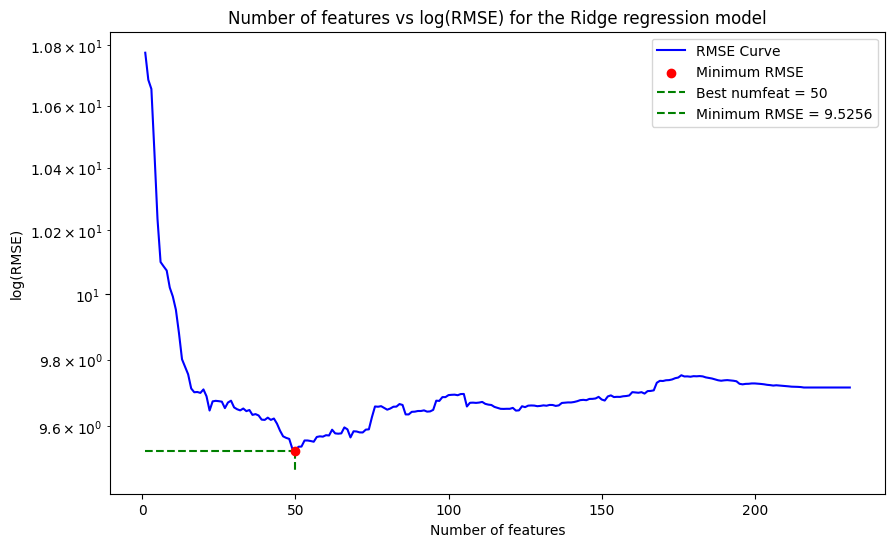

In [31]:
model = Ridge(alpha=0.1,
              random_state=42,
              max_iter=1000,
              solver='auto',
              fit_intercept=True)
best_numfeat = 0
best_score = 50
scores = []
m = len(Xdata_dev.columns)

# find the best features
for numfeat in range(1,m+1 , 1):
    rfe = RFE(model, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the Ridge regression model')
plt.legend()

plt.savefig('rmse_curve_ridge.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()

In [39]:
scaler = StandardScaler()

scaler.fit(copy_dev)
X_final_train = scaler.transform(copy_dev)
X_final_validation = scaler.transform(copy_eval)

y_final_train = ydata_dev

model = Ridge(alpha=0.1,    
                random_state=42,
                max_iter=1000,
                solver='auto',
                fit_intercept=True)

# select the best features
rfe = RFE(model, n_features_to_select= best_numfeat)
print(f'Best number of features: {best_numfeat}')
rfe.fit(X_final_train, y_final_train)

X_final_train_selected = rfe.transform(X_final_train)
X_final_validation_selected = rfe.transform(X_final_validation)

model.fit(X_final_train_selected, y_final_train)

# MRSE for the train
y_final_pred_train = model.predict(X_final_train_selected)

rmse_train = root_mean_squared_error(y_final_train, y_final_pred_train)

print(f'RMSE for the train: {rmse_train}')







Best number of features: 50
RMSE for the train: 9.95964132349361


In [6]:
model = RandomForestRegressor(n_estimators=100,
                                max_depth=10,
                                random_state=42)

best_numfeat = 0
best_score = 50
scores = []
m = 50#len(Xdata_dev.columns)

# find the best features
for numfeat in range(20,20+m+1 , 1):
    rfe = RFE(model, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(20, 20+m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the Random Forest regression model')
plt.legend()

plt.savefig('rmse_curve_rfor.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()

KeyboardInterrupt: 

numfeat = 1 , RMSE = 10.775897535015847 
numfeat = 2 , RMSE = 10.674541219235005 
numfeat = 3 , RMSE = 10.675621547561603 
numfeat = 4 , RMSE = 10.465110258939754 
numfeat = 5 , RMSE = 10.240669925195656 
numfeat = 6 , RMSE = 10.058343806075502 
numfeat = 7 , RMSE = 10.061582314792624 
numfeat = 8 , RMSE = 10.038028546842089 
numfeat = 9 , RMSE = 9.932797058958332 
numfeat = 10 , RMSE = 9.871786433518546 
numfeat = 11 , RMSE = 9.86336072841561 
numfeat = 12 , RMSE = 9.836591840822674 
numfeat = 13 , RMSE = 9.799120450196442 
numfeat = 14 , RMSE = 9.778525553459911 
numfeat = 15 , RMSE = 9.750770649254932 
numfeat = 16 , RMSE = 9.769250870620391 
numfeat = 17 , RMSE = 9.73984886985092 
numfeat = 18 , RMSE = 9.731283759088841 
numfeat = 19 , RMSE = 9.742306929851477 
numfeat = 20 , RMSE = 9.734906913630912 
numfeat = 21 , RMSE = 9.73721939711627 
numfeat = 22 , RMSE = 9.718142949605912 
numfeat = 23 , RMSE = 9.734630216668727 
numfeat = 24 , RMSE = 9.739037150532639 
numfeat = 25 , RMSE 

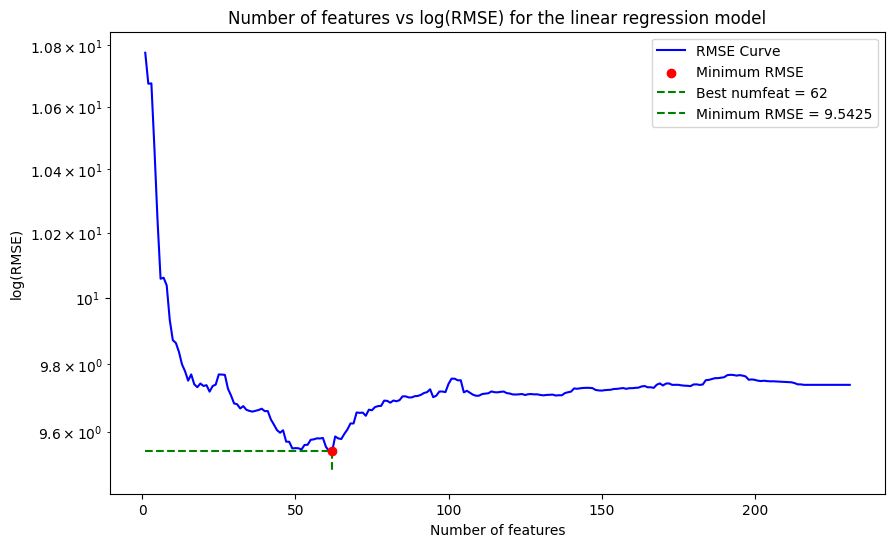

In [10]:
# Linear Regressor
model_lin = LinearRegression()
best_numfeat = 0
best_score = 50
scores = []
m = len(Xdata_dev.columns)

# find the best features
for numfeat in range(1,m+1 , 1):
    rfe = RFE(model_lin, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the linear regression model')
plt.legend()

plt.savefig('rmse_curve_linear.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()

Number of features after PCA: 3
RMSE for the polynomial regressor (degree 1): 10.7647


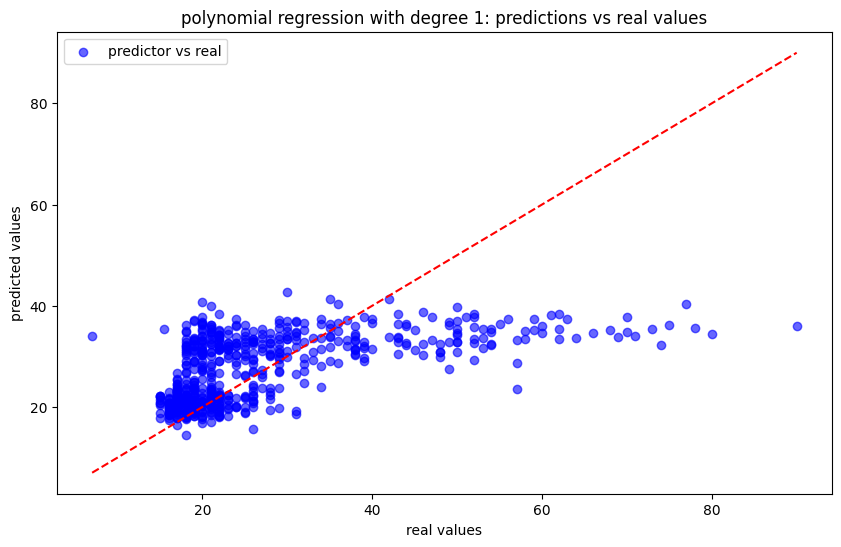

In [7]:

model_lin = LinearRegression()
# Estrazione delle migliori feature
rfe = RFE(model_lin, n_features_to_select=62)
rfe.fit(X_train, y_train)

X_train_best_linear = rfe.transform(X_train)
X_validation_best_linear = rfe.transform(X_validation)



# Creazione di un modello di regressione polinomiale
degree = 1  # Cambia il grado del polinomio in base alle necessità
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Addestramento del modello
poly_model.fit(X_train_best_linear, y_train)

# Valutazione del modello
y_pred = poly_model.predict(X_validation_best_linear)
poly_rmse = root_mean_squared_error(y_validation, y_pred)

print(f"RMSE for the polynomial regressor (degree {degree}): {poly_rmse:.4f}")

# Visualizzazione delle performance (opzionale)
plt.figure(figsize=(10, 6))
plt.scatter(y_validation, y_pred, alpha=0.6, label="predictor vs real", color="blue")
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 
         color="red", linestyle="--")
plt.xlabel("real values")
plt.ylabel("predicted values")
plt.title(f"polynomial regression with degree {degree}: predictions vs real values")
plt.legend()
plt.show()


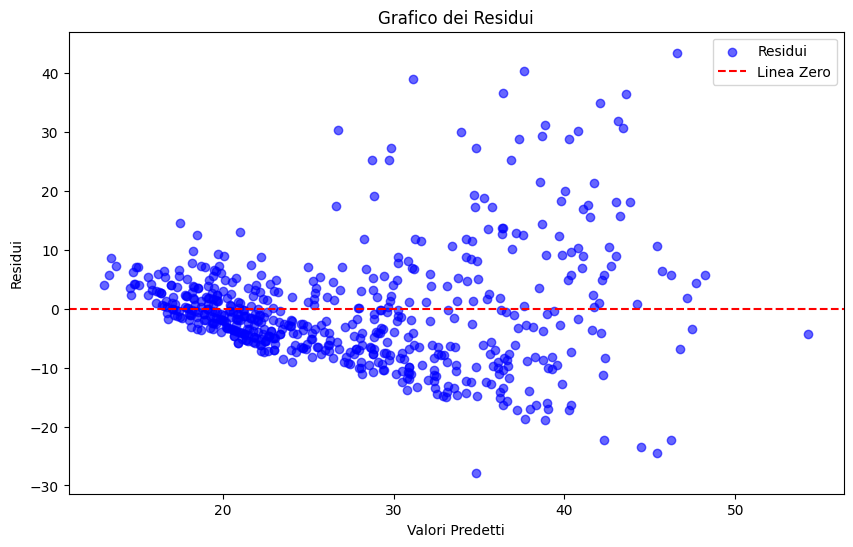

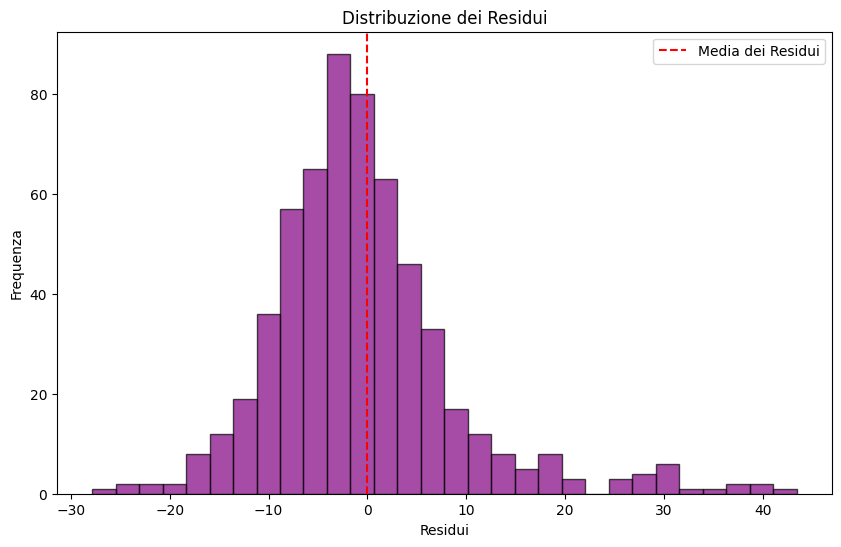

In [14]:
# Calcolo dei residui
residuals = y_validation - y_pred

# Scatter plot dei residui
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="blue", label="Residui")
plt.axhline(0, color='red', linestyle='--', label="Linea Zero")  # Linea di riferimento a residuo zero
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.title("Grafico dei Residui")
plt.legend()
plt.show()

# Istogramma dei residui
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label="Media dei Residui")
plt.xlabel("Residui")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Residui")
plt.legend()
plt.show()


numfeat = 1 , RMSE = 10.776473695013253 
numfeat = 2 , RMSE = 10.675189144355627 
numfeat = 3 , RMSE = 10.676217657053666 
numfeat = 4 , RMSE = 10.468405092144678 
numfeat = 5 , RMSE = 10.244857119619743 
numfeat = 6 , RMSE = 10.134104429746147 
numfeat = 7 , RMSE = 10.123728794701714 
numfeat = 8 , RMSE = 10.113969397523455 
numfeat = 9 , RMSE = 10.063798136009597 
numfeat = 10 , RMSE = 9.983729777273036 
numfeat = 11 , RMSE = 9.917145396413462 
numfeat = 12 , RMSE = 9.824560643190274 
numfeat = 13 , RMSE = 9.785383752924417 
numfeat = 14 , RMSE = 9.755727493356574 
numfeat = 15 , RMSE = 9.759194968991912 
numfeat = 16 , RMSE = 9.739253093255478 
numfeat = 17 , RMSE = 9.771650911798426 
numfeat = 18 , RMSE = 9.772389915666343 
numfeat = 19 , RMSE = 9.783407184380945 
numfeat = 20 , RMSE = 9.776681655706172 
numfeat = 21 , RMSE = 9.777074554556958 
numfeat = 22 , RMSE = 9.768232599187472 
numfeat = 23 , RMSE = 9.751769842374935 
numfeat = 24 , RMSE = 9.750952695189422 
numfeat = 25 , R

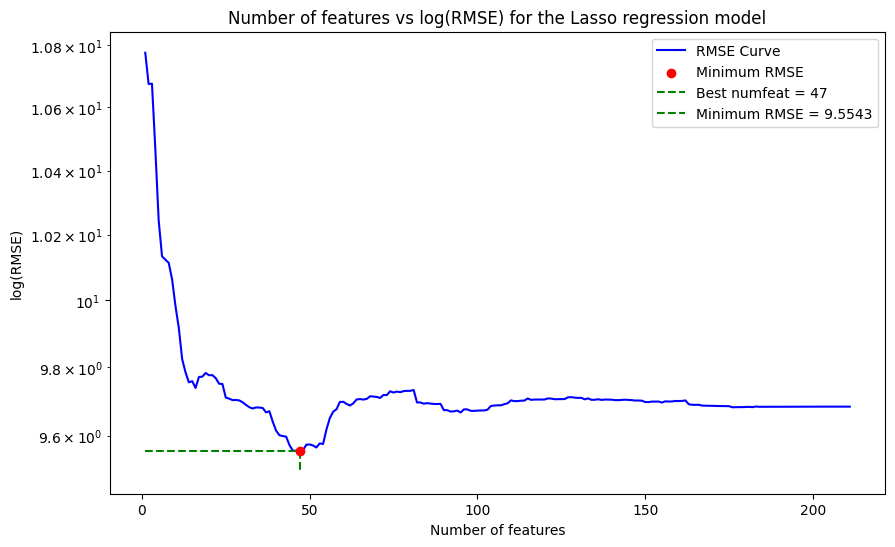

In [5]:
model = Lasso(alpha=0.01,
              random_state=42,
              max_iter=1000,
              fit_intercept=True)
best_numfeat = 0
best_score = 50
scores = []
m = len(Xdata_dev.columns)

# find the best features
for numfeat in range(1,m+1 , 1):
    rfe = RFE(model, n_features_to_select= numfeat)  
    rfe.fit(X_train, y_train)
    
    X_train_selected_forest = rfe.transform(X_train)
    X_test_selected_forest = rfe.transform(X_validation)

    # Fit the model
    model.fit(X_train_selected_forest, y_train)

    # Evaluate the model

    score = root_mean_squared_error(y_validation, model.predict(X_test_selected_forest))
    scores.append(score)
    print(f'numfeat = {numfeat} , RMSE = {score} ')
    
    if score < best_score:
        best_score = score
        best_numfeat = numfeat
        
print(f'The best score is obtained for numfeat = {best_numfeat} and its value is {best_score}')


# plot whit log scale


plt.figure(figsize=(10, 6))
plt.plot(range(1, m+1), scores, label='RMSE Curve', color='blue')

plt.scatter([best_numfeat], [best_score], color='red', zorder=5, label='Minimum RMSE')

# vertical line
plt.plot([best_numfeat, best_numfeat], [best_score, plt.ylim()[0]], color='green', linestyle='--', label=f'Best numfeat = {best_numfeat}')

# horiz line
plt.plot([1, best_numfeat], [best_score, best_score], color='green', linestyle='--', label=f'Minimum RMSE = {best_score:.4f}')

plt.yscale('log')
plt.xlabel('Number of features')
plt.ylabel('log(RMSE)')
plt.title('Number of features vs log(RMSE) for the Lasso regression model')
plt.legend()

plt.savefig('rmse_curve_lasso.pdf', format='pdf', bbox_inches='tight')  # Puoi cambiare 'svg' in 'pdf' o altri formati vettoriali

plt.show()